In [1]:
# !pip install -q kafka-python
# !pip install confluent-kafka
# !pip install "apache-airflow[celery]==2.7.3" --constraint "https://raw.githubusercontent.com/apache/airflow/constraints-2.7.3/constraints-3.8.txt"

In [2]:
# !pip install -q pyod

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
from collections import Counter
import numpy as np
from datetime import datetime, timedelta
import math 
import matplotlib

In [45]:
path = r"D:\Documents\BigData\Group16_Problem5\final_etherium_token_transfer.csv"
df = pd.read_csv(path).drop_duplicates().reset_index().drop(['index'], axis=1)
df

,contract_address,transaction_hash,log_index,block_number,from_address,to_address,value,_id,name,symbol,decimals,idCoingecko,priceChangeLogs,timestamp,item_timestamp,price,price_in_usd
0,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8bca30939f7dffbb2378b0066dc09c25525665521934...,150,18131460,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x5ccc4f7994870238fd560eecac694c279bc132df,9.886976,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694657471,2023-09-14 09:11:11,0.999266,9.879719
1,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xf1e709fedd9913523652a9b264415ccc91add2bb1ebf...,149,18131712,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x536d6b94beef27adb1939d6d49e000b10b09efb7,48.590000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694660507,2023-09-14 10:01:47,0.999266,48.554335
2,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xaf0b446e8f57ae1ec628b6a1a8d96a95ac5bf90e835d...,167,18131740,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x04b7c3d106975c53cff2a00fdcecb22bb3666e12,48.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694660843,2023-09-14 10:07:23,0.999266,48.714217
3,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x71dbeebe4088892bccd8705b379cab26ce79520204b9...,128,18131775,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x056e7810241d84b60c4606bc04913a8a694bd9d8,13.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694661275,2023-09-14 10:14:35,0.999266,13.739907
4,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x92c44049f88f4c7a2077de2d89516a2c67ee42c978a3...,89,18230974,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x6e328537a11cbef1852a9a8345f371243855f680,19.030000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1695864539,2023-09-28 08:28:59,0.999266,19.016032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13757,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8517aa1b18748efbd64af368dc236a8f47ab7587e746...,107,18668296,0xbacd01da8602f47f8289036c8ddc37e359cb9b02,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,2557.060000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701152399,2023-11-28 13:19:59,0.998667,2553.651439
13758,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x49f941c7eb422193cdce44a2969885aa38b14ff09213...,265,18668320,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,0x13394005c1012e708fce1eb974f1130fdc73a5ce,2557.060000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701152687,2023-11-28 13:24:47,0.998667,2553.651439
13759,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x511bcf8a695fe5d41f72dc791a63fc79baa83f4ac991...,234,18668346,0x8619981d6aee03ecc165d67aa1f590ee23e30d78,0x5708363b67e07efdd973351ad5279724216bd69e,387.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701152999,2023-11-28 13:29:59,0.998667,387.233129
13760,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xad45831758fba855515bbb2ff0b828a961838a5d6997...,115,18668464,0xfea615337aec11472fc5a5299afcf9cfc94007aa,0x9bc67b150b4140486287d8e9946e3825174d4dfc,2781.630000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701154427,2023-11-28 13:53:47,0.998667,2777.922087


In [46]:
# path = r"D:\Documents\BigData\data\final_etherium_top_token_transfer.csv"
# df = pd.read_csv(path)
# df

In [47]:
# df = df[df['timestamp'] >= 1698771600]
# df_1month = df.copy()
# df_1month

In [48]:
df.count()

contract_address    13762
transaction_hash    13762
log_index           13762
block_number        13762
from_address        13762
to_address          13762
value               13762
_id                 13762
name                13762
symbol              13762
decimals            13762
idCoingecko         13762
priceChangeLogs     13762
timestamp           13762
item_timestamp      13762
price               13762
price_in_usd        13762
dtype: int64

In [49]:
df['Time'] = pd.to_datetime(df['item_timestamp'])
df.head()

,contract_address,transaction_hash,log_index,block_number,from_address,to_address,value,_id,name,symbol,decimals,idCoingecko,priceChangeLogs,timestamp,item_timestamp,price,price_in_usd,Time
0,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8bca30939f7dffbb2378b0066dc09c25525665521934...,150,18131460,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x5ccc4f7994870238fd560eecac694c279bc132df,9.886976,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694657471,2023-09-14 09:11:11,0.999266,9.879719,2023-09-14 09:11:11
1,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xf1e709fedd9913523652a9b264415ccc91add2bb1ebf...,149,18131712,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x536d6b94beef27adb1939d6d49e000b10b09efb7,48.590000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694660507,2023-09-14 10:01:47,0.999266,48.554335,2023-09-14 10:01:47
2,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xaf0b446e8f57ae1ec628b6a1a8d96a95ac5bf90e835d...,167,18131740,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x04b7c3d106975c53cff2a00fdcecb22bb3666e12,48.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694660843,2023-09-14 10:07:23,0.999266,48.714217,2023-09-14 10:07:23
3,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x71dbeebe4088892bccd8705b379cab26ce79520204b9...,128,18131775,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x056e7810241d84b60c4606bc04913a8a694bd9d8,13.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694661275,2023-09-14 10:14:35,0.999266,13.739907,2023-09-14 10:14:35
4,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x92c44049f88f4c7a2077de2d89516a2c67ee42c978a3...,89,18230974,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x6e328537a11cbef1852a9a8345f371243855f680,19.030000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1695864539,2023-09-28 08:28:59,0.999266,19.016032,2023-09-28 08:28:59


[Text(0.5, 1.0, 'Transactions in latest 1 month')]

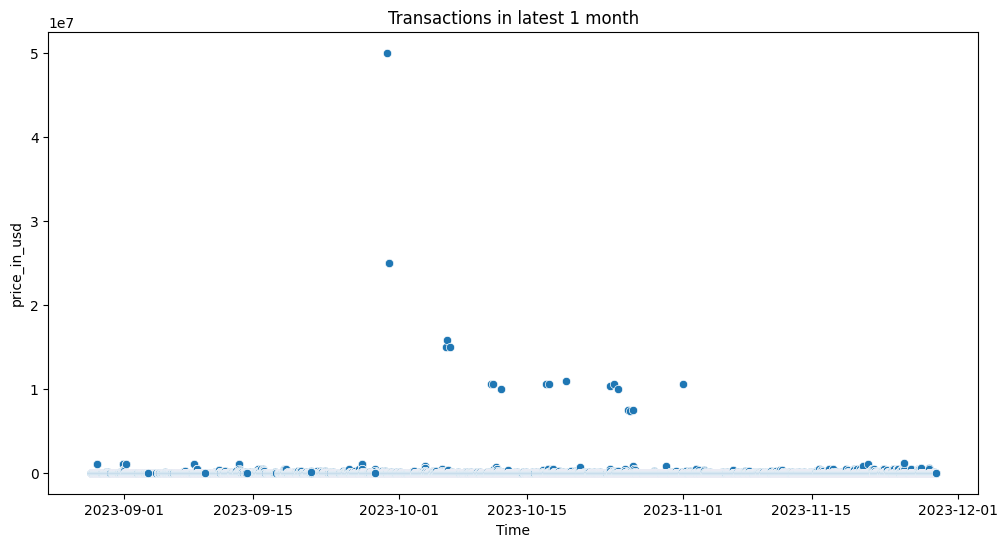

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.Time, y=df.price_in_usd).set(title="Transactions in latest 1 month")

In [51]:
wash_check = df[['from_address', 'to_address']]
wash_check

,from_address,to_address
0,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x5ccc4f7994870238fd560eecac694c279bc132df
1,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x536d6b94beef27adb1939d6d49e000b10b09efb7
2,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x04b7c3d106975c53cff2a00fdcecb22bb3666e12
3,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x056e7810241d84b60c4606bc04913a8a694bd9d8
4,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x6e328537a11cbef1852a9a8345f371243855f680
...,...,...
13757,0xbacd01da8602f47f8289036c8ddc37e359cb9b02,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc
13758,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,0x13394005c1012e708fce1eb974f1130fdc73a5ce
13759,0x8619981d6aee03ecc165d67aa1f590ee23e30d78,0x5708363b67e07efdd973351ad5279724216bd69e
13760,0xfea615337aec11472fc5a5299afcf9cfc94007aa,0x9bc67b150b4140486287d8e9946e3825174d4dfc


In [52]:
dupes = wash_check[wash_check.duplicated(['from_address'])]
dupes

,from_address,to_address
2,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x04b7c3d106975c53cff2a00fdcecb22bb3666e12
3,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x056e7810241d84b60c4606bc04913a8a694bd9d8
4,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x6e328537a11cbef1852a9a8345f371243855f680
10,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0xf87287c355c12c7ce02ffbf0b6d4f9967235da5c
11,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0xc24c76e5d032fc1ac4d336eccdca585953779207
...,...,...
13752,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0xb8239a2df0f95c402f313d3c3d0c82741347c593
13753,0xb8239a2df0f95c402f313d3c3d0c82741347c593,0xb61bb0c3f4afc30b1d8dbcb8767c0e38c4829322
13754,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x8619981d6aee03ecc165d67aa1f590ee23e30d78
13755,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x16eb52a4085ea72c817f693fe2014d2852d6a755


In [53]:
accounts = df['from_address'].to_list() + df['to_address'].to_list()
most_common = Counter(accounts).most_common()
[x for x in most_common if x[1] > 500]

[('0x264bd8291fae1d75db2c5f573b07faa6715997b5', 4421),
 ('0x2bcb6bc69991802124f04a1114ee487ff3fad197', 2405),
 ('0x46340b20830761efd32832a74d7169b29feb9758', 751),
 ('0xb61bb0c3f4afc30b1d8dbcb8767c0e38c4829322', 722),
 ('0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43', 713)]

In [54]:
df[(df['from_address'] == '0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43') | (df['to_address'] == '0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43')]

,contract_address,transaction_hash,log_index,block_number,from_address,to_address,value,_id,name,symbol,decimals,idCoingecko,priceChangeLogs,timestamp,item_timestamp,price,price_in_usd,Time
0,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8bca30939f7dffbb2378b0066dc09c25525665521934...,150,18131460,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x5ccc4f7994870238fd560eecac694c279bc132df,9.886976,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694657471,2023-09-14 09:11:11,0.999266,9.879719,2023-09-14 09:11:11
42,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xb25d340f1e1f61d1cf18f3364eefe17a1f448144f6c3...,269,18134401,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0xe57e3614c40e7c953ab495196b1aa1f1e2848e24,10.604020,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694693051,2023-09-14 19:04:11,0.999266,10.596237,2023-09-14 19:04:11
45,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x25b54552a1c1e4dc0024128f593ed5e154063ccedc4f...,190,18134693,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0xa64ad36572b4d6299b3fd58ab8d67126e4a8f5fa,27.011279,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694696651,2023-09-14 20:04:11,0.999266,26.991453,2023-09-14 20:04:11
51,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xd069d8c21598f3b402cd0e84f246c5dce667e779d4d1...,11,18134830,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x00840c2337c8eba65bb0d8d9a1f3fcec1a87db0c,336.965227,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694698391,2023-09-14 20:33:11,0.999266,336.717895,2023-09-14 20:33:11
140,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xc78db4b7d0af2e89521ac1717a52002562ac017531b3...,127,18139842,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x6c6f01e5c0edae0bef723211e11de919e68a954a,177346.183343,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694759291,2023-09-15 13:28:11,0.999266,177216.011244,2023-09-15 13:28:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13717,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x506dc57a4d2db49cf36774519e2452a7f332ab6cca90...,142,18666625,0x6b110e422df150c35a89757474fa9b2b6670e9e0,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,3603.160000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701132191,2023-11-28 07:43:11,0.998667,3598.356988,2023-11-28 07:43:11
13729,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x1b8b241a4a68b88bcb23dd2f4e547eb5b44d61f3c130...,175,18666952,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x0eb8a200836068655361f7bbe8beb8ab7751a246,1.313135,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701136151,2023-11-28 08:49:11,0.998667,1.311385,2023-11-28 08:49:11
13735,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xbf8bf07da8df9e3b2fcf82fe9682d38af0fae6837bb2...,164,18667077,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x960e7c61b2dae6962fb26cb7abe8cd11b1237a6d,117.482676,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701137651,2023-11-28 09:14:11,0.998667,117.326072,2023-11-28 09:14:11
13741,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x664844f8fc94971ee3e8ae032e23ed6d15ade887f501...,155,18667202,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0xee1719164466e99bd93c609143bffba706f6863c,7.710054,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701139151,2023-11-28 09:39:11,0.998667,7.699776,2023-11-28 09:39:11


In [55]:
df_test = df[['contract_address','from_address', 'to_address','value', 'price_in_usd', 'Time']].set_index('Time').sort_index()
df_test


,contract_address,from_address,to_address,value,price_in_usd
Time,,,,,
2023-08-28 07:42:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x8b7c3e5fbee4759e1d202fd8d2079edabcb34180,20.000000,19.985320
2023-08-28 07:46:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0xeac06fb98a11d6cc0af46b09556c1138f39ccc76,48.750000,48.714217
2023-08-28 07:52:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x77c0c89471f2f3c7c24bdcbc195e6df9f1672b9e,20.000000,19.985320
2023-08-28 08:18:35,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x643ea0885875a77bf8dc3e0f3ead866a125276b1,0x8dc8e658b3ab437897471318c25722b25dfe2b13,19.419531,19.405277
2023-08-28 10:20:23,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xf736025f5831409c4fb613c824452f96956886c8,0x643ea0885875a77bf8dc3e0f3ead866a125276b1,96.400000,96.329242
...,...,...,...,...,...
2023-11-28 13:19:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xbacd01da8602f47f8289036c8ddc37e359cb9b02,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,2557.060000,2553.651439
2023-11-28 13:24:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,0x13394005c1012e708fce1eb974f1130fdc73a5ce,2557.060000,2553.651439
2023-11-28 13:29:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8619981d6aee03ecc165d67aa1f590ee23e30d78,0x5708363b67e07efdd973351ad5279724216bd69e,387.750000,387.233129


In [56]:
# data_test = df_test[-10:]
# df_test = df_test[:-10]

In [57]:
# get the sum of the previous 1 minutes transaction amounts.
df_test['sum_5days'] = df_test.groupby('contract_address')['value'].transform(lambda s: s.rolling(timedelta(days=5)).sum())
df_test['count_5days'] = df_test.groupby('contract_address')['price_in_usd'].transform(lambda s: s.rolling(timedelta(days=5)).count())
# data_test['sum_5days'] = data_test.groupby('contract_address')['value'].transform(lambda s: s.rolling(timedelta(days=5)).sum())
# data_test['count_5days'] = data_test.groupby('contract_address')['price_in_usd'].transform(lambda s: s.rolling(timedelta(days=5)).count())
df_test

,contract_address,from_address,to_address,value,price_in_usd,sum_5days,count_5days
Time,,,,,,,
2023-08-28 07:42:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x8b7c3e5fbee4759e1d202fd8d2079edabcb34180,20.000000,19.985320,2.000000e+01,1.0
2023-08-28 07:46:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0xeac06fb98a11d6cc0af46b09556c1138f39ccc76,48.750000,48.714217,6.875000e+01,2.0
2023-08-28 07:52:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x77c0c89471f2f3c7c24bdcbc195e6df9f1672b9e,20.000000,19.985320,8.875000e+01,3.0
2023-08-28 08:18:35,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x643ea0885875a77bf8dc3e0f3ead866a125276b1,0x8dc8e658b3ab437897471318c25722b25dfe2b13,19.419531,19.405277,1.081695e+02,4.0
2023-08-28 10:20:23,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xf736025f5831409c4fb613c824452f96956886c8,0x643ea0885875a77bf8dc3e0f3ead866a125276b1,96.400000,96.329242,2.045695e+02,5.0
...,...,...,...,...,...,...,...
2023-11-28 13:19:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xbacd01da8602f47f8289036c8ddc37e359cb9b02,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,2557.060000,2553.651439,2.996809e+07,1086.0
2023-11-28 13:24:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,0x13394005c1012e708fce1eb974f1130fdc73a5ce,2557.060000,2553.651439,2.997063e+07,1086.0
2023-11-28 13:29:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8619981d6aee03ecc165d67aa1f590ee23e30d78,0x5708363b67e07efdd973351ad5279724216bd69e,387.750000,387.233129,2.997098e+07,1085.0


In [58]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data 
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

anomaly_proportion = 0.1

# train IForest detector
clf_name = 'Anomaly Detection - Isolation Forest'
clf = IForest(contamination=anomaly_proportion)
X = df_test[['count_5days', 'sum_5days']]
clf.fit(X)

# get the prediction labels and outlier scores of the training data
df_test['y_pred'] = clf.labels_ # binary labels (0: inliers, 1: outliers)
df_test['y_scores'] = clf.decision_scores_ # raw outlier scores. The bigger the number the greater the anomaly
df_test.sort_values(by=['y_pred'], ascending=False).head(15)

,contract_address,from_address,to_address,value,price_in_usd,sum_5days,count_5days,y_pred,y_scores
Time,,,,,,,,,
2023-08-28 07:42:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x8b7c3e5fbee4759e1d202fd8d2079edabcb34180,20.000000,19.985320,2.000000e+01,1.0,1,0.152034
2023-10-02 03:42:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x46340b20830761efd32832a74d7169b29feb9758,0x3f7e278d92ee4306b66c1ccb804d7efc1d5b7482,16.147934,16.136081,1.044041e+08,587.0,1,0.074087
2023-10-02 05:32:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x2bcb6bc69991802124f04a1114ee487ff3fad197,0x264bd8291fae1d75db2c5f573b07faa6715997b5,500.000000,499.633000,1.044054e+08,588.0,1,0.070256
2023-10-02 05:28:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xd7d858876404c2795c39a6c9fdb3d183f49ae5a3,0x2bcb6bc69991802124f04a1114ee487ff3fad197,500.000000,499.633000,1.044049e+08,587.0,1,0.074087
2023-10-02 05:24:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x66ab6a57322ac5fd7026662675db0e83307e025e,0xd7d858876404c2795c39a6c9fdb3d183f49ae5a3,500.000000,499.633000,1.044048e+08,587.0,1,0.074087
2023-10-02 05:22:35,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xc30c8b862f7de6ba5d7eaeb113c78ec6b5ded04b,0x66ab6a57322ac5fd7026662675db0e83307e025e,500.898277,500.530618,1.044043e+08,586.0,1,0.075390
2023-10-02 05:12:35,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x2bcb6bc69991802124f04a1114ee487ff3fad197,0x264bd8291fae1d75db2c5f573b07faa6715997b5,82.081981,82.021733,1.044043e+08,587.0,1,0.074087
2023-10-02 05:08:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xca4e472c8e92bb53824ec2ca7a4da2f0cdbf76fa,0x2bcb6bc69991802124f04a1114ee487ff3fad197,82.081981,82.021733,1.044043e+08,587.0,1,0.074087
2023-10-02 05:03:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0xca4e472c8e92bb53824ec2ca7a4da2f0cdbf76fa,82.081981,82.021733,1.044042e+08,586.0,1,0.075390


In [59]:
import json
with open(r'D:\Documents\BigData\scam_address.json', 'r') as f:
    test_addresses = json.load(f)
    print(len(test_addresses))

13


### Check accuracy for scam grouth truth

In [60]:
inference1 = df_test[df_test['to_address'].apply(lambda x: any([k == x for k in test_addresses]))]
inference2 = df_test[df_test['from_address'].apply(lambda x: any([k == x for k in test_addresses]))]
detected = list(inference1[inference1['y_pred'] == 1]['to_address']) + list(inference2[inference2['y_pred'] == 1]['from_address'])
len(set(detected))

7

In [62]:
set(detected)

{'0x0000000000a84d1a9b0063a910315c7ffa9cd248',
 '0x0d0707963952f2fba59dd06f2b425ace40b492fe',
 '0x1111111254eeb25477b68fb85ed929f73a960582',
 '0x29488e5fd6bf9b3cc98a9d06a25204947cccbe4d',
 '0x9008d19f58aabd9ed0d60971565aa8510560ab41',
 '0x9e8213bb81f5b7fe3cde490a096a630279ba063b',
 '0xe37e799d5077682fa0a244d46e5649f71457bd09'}

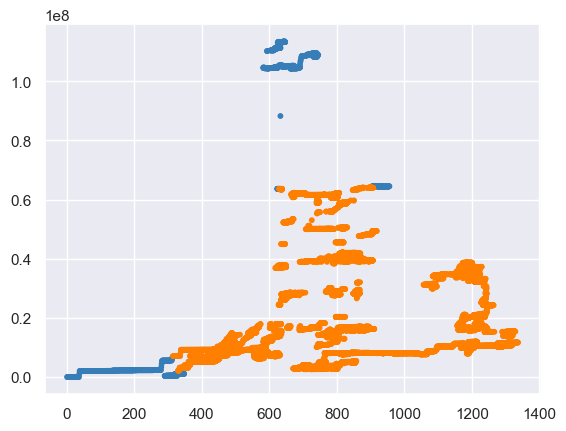

In [76]:
# y_pred = clf.predict(X)
colors = np.array(['#377eb8', '#ff7f00'])
# plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(y_pred - 1) // 2])
plt.scatter(df_test['count_5days'], df_test['sum_5days'], s=10, color=colors[(df_test['y_pred'] - 1) // 2])


C:\Users\nguye\AppData\Local\Temp\ipykernel_13900\3495880316.py:33: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  [a.collections[0], b, c],


Text(0, 0.5, '5-day sum of transactions.')

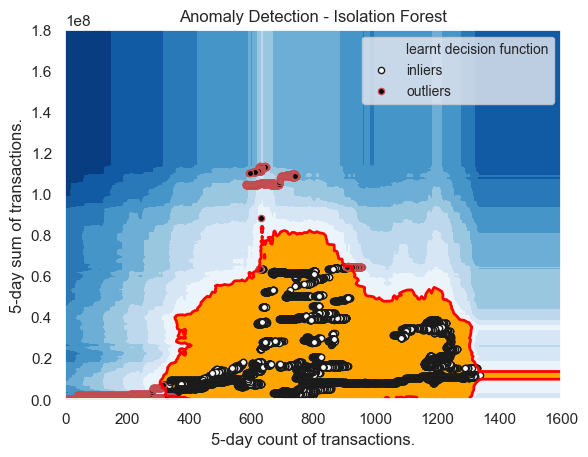

In [77]:
xx, yy = np.meshgrid(np.linspace(0, 1600, 200), np.linspace(0, 180000000, 200))

# decision function calculates the raw anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])*-1
Z = Z.reshape(xx.shape)
threshold = (df_test.loc[df_test['y_pred'] == 1, 'y_scores'].min()*-1)/2 + (df_test.loc[df_test['y_pred'] == 0, 'y_scores'].max()*-1)/2

subplot = plt.subplot(1, 1, 1)

# fill blue colormap from minium anomaly score to threshold value
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Blues_r)

# draw red contour line where anomaly score is equal to threshold
a = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')

# fill orange contour lines where range of anomaly score is from threshold to maximum anomaly
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')

msk = df_test['y_pred'] == 0
x = df_test.loc[msk, ['count_5days', 'sum_5days']].values 

# scatter plot of inliers with white dots
b = subplot.scatter(x[:, 0], x[:, 1], c='white', s=20, edgecolor='k')

msk = df_test['y_pred'] == 1
x = df_test.loc[msk, ['count_5days', 'sum_5days']].values 

# scatter plot of outliers with black dots
c = subplot.scatter(x[:, 0], x[:, 1], c='black', s=20, edgecolors='r')
subplot.axis('tight')

subplot.legend(
    [a.collections[0], b, c],
    ['learnt decision function', 'inliers', 'outliers'],
    prop=matplotlib.font_manager.FontProperties(size=10),
    loc='upper right'
)

subplot.set_title(clf_name)
subplot.set_xlim((0, 1600))
subplot.set_ylim((0, 180000000))

subplot.set_xlabel("5-day count of transactions.")
subplot.set_ylabel("5-day sum of transactions.")

In [21]:
x_test = data_test[['count_5days', 'sum_5days']]
y_pred = clf.predict(x_test.values)
y_scores = clf.decision_function(x_test.values)
print(y_pred)
print(y_scores)

[1 1 1 1 1 1 1 1 1 1]
[0.03008425 0.03008425 0.03008425 0.03008425 0.03008425 0.03100428
 0.02962471 0.02962471 0.02962471 0.02916547]


C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'zoder'
  cset = contour_func(


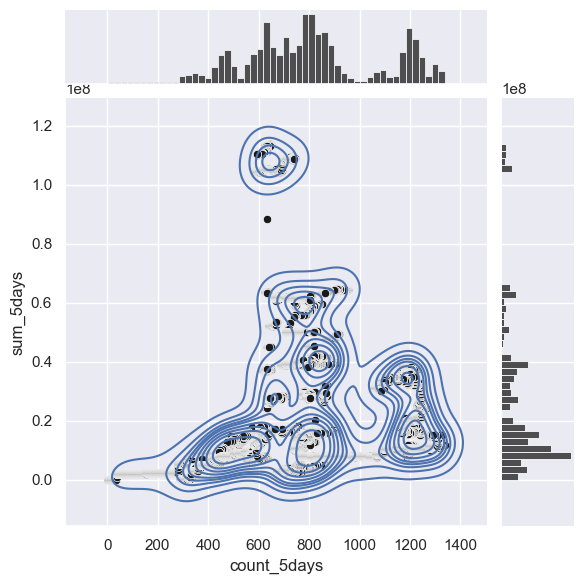

In [59]:
sns.set(style="darkgrid")
sns.jointplot(x="count_5days", y="sum_5days", data=df_test[['count_5days', 'sum_5days']], color='k').plot_joint(sns.kdeplot, zoder=0)

In [36]:
from pyod.models.pca import PCA

In [78]:
clf_pca = PCA()
clf_pca.fit(X.values)

PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [79]:
# y_pred = clf_pca.predict(X.values)
# y_scores = clf_pca.decision_function(X.values)

df_test_pca = df_test.copy()
df_test_pca['y_pred'] = clf_pca.labels_ # binary labels (0: inliers, 1: outliers)
df_test_pca['y_scores'] = clf_pca.decision_scores_ # raw outlier scores. The bigger the number the greater the anomaly
df_test_pca.sort_values(by=['y_pred'], ascending=False).head(15)

,contract_address,from_address,to_address,value,price_in_usd,sum_5days,count_5days,y_pred,y_scores
Time,,,,,,,,,
2023-08-28 07:42:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x8b7c3e5fbee4759e1d202fd8d2079edabcb34180,20.000000,19.985320,2.000000e+01,1.0,1,10.189305
2023-11-18 10:53:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x035e79ed46655f55c7cee91b4e49d87bc1c170c5,0x264bd8291fae1d75db2c5f573b07faa6715997b5,665.300000,664.872212,1.060495e+07,1300.0,1,10.864314
2023-11-18 10:51:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x5e9f3b5bd50211c6b073dbb9f03381fdcfcfedc9,0x035e79ed46655f55c7cee91b4e49d87bc1c170c5,665.300000,664.872212,1.060424e+07,1298.0,1,10.836712
2023-11-18 10:45:59,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x46340b20830761efd32832a74d7169b29feb9758,0x5e9f3b5bd50211c6b073dbb9f03381fdcfcfedc9,665.300000,664.872212,1.060379e+07,1298.0,1,10.836727
2023-11-18 10:21:11,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x6ba7fe01eec4c6a4308c8e2b35970e0488ce9a86,0xc0e6a85fb6e36108a91345a45f4acf731a71fc58,147.505218,147.410372,1.061279e+07,1304.0,1,10.919318
2023-11-18 10:16:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x48c04ed5691981c42154c6167398f95e8f38a7ff,0x6ba7fe01eec4c6a4308c8e2b35970e0488ce9a86,147.505218,147.410372,1.061265e+07,1303.0,1,10.905500
2023-11-18 10:14:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x5f509fd62c81148196b0a041d80b7760b96eead5,0x48c04ed5691981c42154c6167398f95e8f38a7ff,59.150000,59.111967,1.061266e+07,1303.0,1,10.905500
2023-11-18 10:14:35,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x6f4deb5ece3dbe1753a1c4fe65ae9f30774007ff,0xb61bb0c3f4afc30b1d8dbcb8767c0e38c4829322,996.510000,995.869244,1.061260e+07,1302.0,1,10.891681
2023-11-18 10:12:47,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x6f4deb5ece3dbe1753a1c4fe65ae9f30774007ff,996.510000,995.869244,1.061160e+07,1301.0,1,10.877897


In [80]:
inference1 = df_test_pca[df_test_pca['to_address'].apply(lambda x: any([k == x for k in test_addresses]))]
inference2 = df_test_pca[df_test_pca['from_address'].apply(lambda x: any([k == x for k in test_addresses]))]
detected = list(inference1[inference1['y_pred'] == 1]['to_address']) + list(inference2[inference2['y_pred'] == 1]['from_address'])
len(set(detected))

6

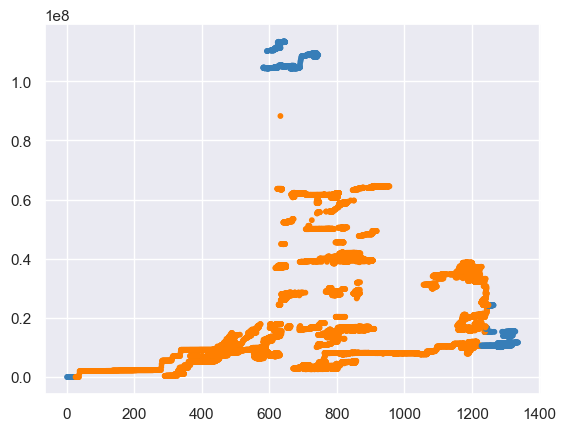

In [81]:
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(df_test_pca['count_5days'], df_test_pca['sum_5days'], s=10, color=colors[(df_test_pca['y_pred'] - 1) // 2])


In [27]:
# x_test = data_test[['count_5days', 'sum_5days']]
# y_pred = clf_pca.predict(x_test.values)
# y_scores = clf_pca.decision_function(x_test.values)
# print(y_pred)
# print(y_scores)

[1 1 1 1 1 1 1 1 1 1]
[10.87485305 10.86339069 10.85192127 10.84046616 10.8290134  10.8174595
 10.80590803 10.79444824 10.78289246 10.77133911]


### Group by user transaction

In [16]:
df1 = df[['from_address', 'price_in_usd', 'Time']].rename(columns={'from_address': 'address'})
df2 = df[['to_address', 'price_in_usd', 'Time']].rename(columns={'to_address': 'address'})
df_wallets = pd.concat([df1, df2]).set_index('Time').sort_index()
df_wallets
# df2

,address,price_in_usd
Time,,
2023-08-28 07:42:11,0x8b7c3e5fbee4759e1d202fd8d2079edabcb34180,19.985320
2023-08-28 07:42:11,0x264bd8291fae1d75db2c5f573b07faa6715997b5,19.985320
2023-08-28 07:46:59,0x264bd8291fae1d75db2c5f573b07faa6715997b5,48.714217
2023-08-28 07:46:59,0xeac06fb98a11d6cc0af46b09556c1138f39ccc76,48.714217
2023-08-28 07:52:47,0x77c0c89471f2f3c7c24bdcbc195e6df9f1672b9e,19.985320
...,...,...
2023-11-28 13:29:59,0x8619981d6aee03ecc165d67aa1f590ee23e30d78,387.233129
2023-11-28 13:53:47,0x9bc67b150b4140486287d8e9946e3825174d4dfc,2777.922087
2023-11-28 13:53:47,0xfea615337aec11472fc5a5299afcf9cfc94007aa,2777.922087


In [17]:
df_wallets_test = df_wallets.copy()
df_wallets_test['sum_5days'] = df_wallets_test.groupby('address')['price_in_usd'].transform(lambda s: s.rolling(timedelta(days=5)).sum())
df_wallets_test['count_5days'] = df_wallets_test.groupby('address')['price_in_usd'].transform(lambda s: s.rolling(timedelta(days=5)).count())
# data_test['sum_5days'] = data_test.groupby('contract_address')['value'].transform(lambda s: s.rolling(timedelta(days=5)).sum())
# data_test['count_5days'] = data_test.groupby('contract_address')['price_in_usd'].transform(lambda s: s.rolling(timedelta(days=5)).count())
df_wallets_test

,address,price_in_usd,sum_5days,count_5days
Time,,,,
2023-08-28 07:42:11,0x8b7c3e5fbee4759e1d202fd8d2079edabcb34180,19.985320,19.985320,1.0
2023-08-28 07:42:11,0x264bd8291fae1d75db2c5f573b07faa6715997b5,19.985320,19.985320,1.0
2023-08-28 07:46:59,0x264bd8291fae1d75db2c5f573b07faa6715997b5,48.714217,68.699537,2.0
2023-08-28 07:46:59,0xeac06fb98a11d6cc0af46b09556c1138f39ccc76,48.714217,48.714217,1.0
2023-08-28 07:52:47,0x77c0c89471f2f3c7c24bdcbc195e6df9f1672b9e,19.985320,19.985320,1.0
...,...,...,...,...
2023-11-28 13:29:59,0x8619981d6aee03ecc165d67aa1f590ee23e30d78,387.233129,729.016923,3.0
2023-11-28 13:53:47,0x9bc67b150b4140486287d8e9946e3825174d4dfc,2777.922087,2777.922087,1.0
2023-11-28 13:53:47,0xfea615337aec11472fc5a5299afcf9cfc94007aa,2777.922087,2777.922087,1.0


In [28]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data 
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
anomaly_proportion = 0.01

# train IForest detector
clf_name = 'Anomaly Detection - Isolation Forest'
clf = IForest(contamination=anomaly_proportion)
X = df_wallets_test[['count_5days', 'sum_5days']]
clf.fit(X)

# get the prediction labels and outlier scores of the training data
df_wallets_test['y_pred'] = clf.labels_ # binary labels (0: inliers, 1: outliers)
df_wallets_test['y_scores'] = clf.decision_scores_ # raw outlier scores. The bigger the number the greater the anomaly
df_wallets_test.sort_values(by=['y_pred'], ascending=False).head(15)

,address,price_in_usd,sum_5days,count_5days,y_pred,y_scores
Time,,,,,,
2023-10-27 14:39:23,0x264bd8291fae1d75db2c5f573b07faa6715997b5,38.161969,3.561795e+07,221.0,1,0.021705
2023-10-11 03:55:23,0x264bd8291fae1d75db2c5f573b07faa6715997b5,54.959630,3.074797e+07,266.0,1,0.002618
2023-10-11 03:15:47,0x264bd8291fae1d75db2c5f573b07faa6715997b5,60.655446,3.074775e+07,263.0,1,0.000531
2023-10-07 17:18:23,0x264bd8291fae1d75db2c5f573b07faa6715997b5,36.882908,3.168877e+07,227.0,1,0.001753
2023-10-07 17:13:11,0x264bd8291fae1d75db2c5f573b07faa6715997b5,977.801766,3.168873e+07,226.0,1,0.002235
2023-10-11 03:34:23,0x264bd8291fae1d75db2c5f573b07faa6715997b5,99.926600,3.074783e+07,263.0,1,0.000531
2023-10-26 19:50:59,0x264bd8291fae1d75db2c5f573b07faa6715997b5,27.849543,3.560027e+07,208.0,1,0.028180
2023-10-11 03:35:23,0x264bd8291fae1d75db2c5f573b07faa6715997b5,71.947152,3.074790e+07,264.0,1,0.000531
2023-10-26 20:01:23,0x264bd8291fae1d75db2c5f573b07faa6715997b5,47.794893,3.560031e+07,209.0,1,0.027180


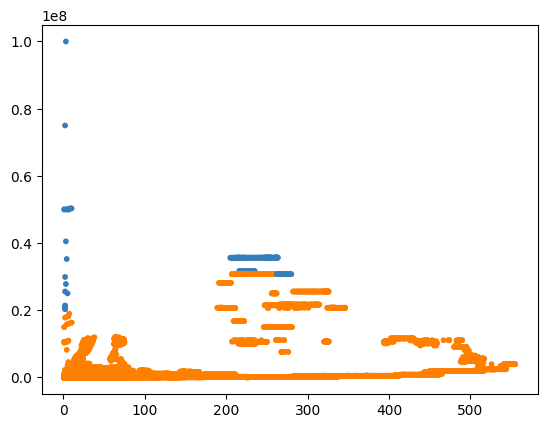

In [29]:
# y_pred = clf.predict(X)
colors = np.array(['#377eb8', '#ff7f00'])
# plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(y_pred - 1) // 2])
plt.scatter(df_wallets_test['count_5days'], df_wallets_test['sum_5days'], s=10, color=colors[(df_wallets_test['y_pred'] - 1) // 2])


In [25]:
inference = df_wallets_test[df_wallets_test['address'].apply(lambda x: any([k == x for k in test_addresses]))]
detected = list(inference[inference['y_pred'] == 1]['address'])
len(set(detected))

0

### Token transfer anonaly detection with kmeans

## Anomaly Detection in Bitcoin Network Using Unsupervised Learning Methods

In [63]:
import pandas as pd
import numpy as np

In [64]:
path = r"D:\Documents\BigData\Group16_Problem5\final_etherium_token_transfer.csv"
# path = r'D:\Documents\BigData\data\final_etherium_top_token_transfer_1month.csv'
new_df = pd.read_csv(path).drop_duplicates().reset_index().drop(['index'], axis=1)
# new_df = df_1month.copy()
new_df['item_timestamp'] = pd.to_datetime(new_df['item_timestamp'])
new_df

,contract_address,transaction_hash,log_index,block_number,from_address,to_address,value,_id,name,symbol,decimals,idCoingecko,priceChangeLogs,timestamp,item_timestamp,price,price_in_usd
0,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8bca30939f7dffbb2378b0066dc09c25525665521934...,150,18131460,0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43,0x5ccc4f7994870238fd560eecac694c279bc132df,9.886976,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694657471,2023-09-14 09:11:11,0.999266,9.879719
1,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xf1e709fedd9913523652a9b264415ccc91add2bb1ebf...,149,18131712,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x536d6b94beef27adb1939d6d49e000b10b09efb7,48.590000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694660507,2023-09-14 10:01:47,0.999266,48.554335
2,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xaf0b446e8f57ae1ec628b6a1a8d96a95ac5bf90e835d...,167,18131740,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x04b7c3d106975c53cff2a00fdcecb22bb3666e12,48.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694660843,2023-09-14 10:07:23,0.999266,48.714217
3,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x71dbeebe4088892bccd8705b379cab26ce79520204b9...,128,18131775,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x056e7810241d84b60c4606bc04913a8a694bd9d8,13.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1694661275,2023-09-14 10:14:35,0.999266,13.739907
4,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x92c44049f88f4c7a2077de2d89516a2c67ee42c978a3...,89,18230974,0x264bd8291fae1d75db2c5f573b07faa6715997b5,0x6e328537a11cbef1852a9a8345f371243855f680,19.030000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1695864539,2023-09-28 08:28:59,0.999266,19.016032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13757,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x8517aa1b18748efbd64af368dc236a8f47ab7587e746...,107,18668296,0xbacd01da8602f47f8289036c8ddc37e359cb9b02,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,2557.060000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701152399,2023-11-28 13:19:59,0.998667,2553.651439
13758,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x49f941c7eb422193cdce44a2969885aa38b14ff09213...,265,18668320,0x8ec4fbf3deb30b2e51d77e2108cd3f96b11044bc,0x13394005c1012e708fce1eb974f1130fdc73a5ce,2557.060000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701152687,2023-11-28 13:24:47,0.998667,2553.651439
13759,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0x511bcf8a695fe5d41f72dc791a63fc79baa83f4ac991...,234,18668346,0x8619981d6aee03ecc165d67aa1f590ee23e30d78,0x5708363b67e07efdd973351ad5279724216bd69e,387.750000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701152999,2023-11-28 13:29:59,0.998667,387.233129
13760,0x6c3ea9036406852006290770bedfcaba0e23a0e8,0xad45831758fba855515bbb2ff0b828a961838a5d6997...,115,18668464,0xfea615337aec11472fc5a5299afcf9cfc94007aa,0x9bc67b150b4140486287d8e9946e3825174d4dfc,2781.630000,0x1_0x6c3ea9036406852006290770bedfcaba0e23a0e8,PayPal USD,pyusd,6,paypal-usd,"{'1698492206': 0.999266, '1698584350': 1.0, '1...",1701154427,2023-11-28 13:53:47,0.998667,2777.922087


In [30]:
# # If you have installed dgl-cuXX package, please uninstall it first.
# !pip install  dgl -f https://data.dgl.ai/wheels/repo.html
# !pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

In [93]:
pd.DataFrame(new_df.groupby(by=['to_address'])['timestamp'].min())

,timestamp
to_address,
0x0000000000000000000000000000000000000000,1700515499
0x00000000003d71e9fc20fdeb46fb86afbbee4772,1694806139
0x00000000009726632680fb29d3f7a9734e3010e2,1694048555
0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,1698421547
0x0000000000a84d1a9b0063a910315c7ffa9cd248,1696523123
...,...
0xffd327a871660d58ac93cb1ae446b88ca349ad15,1699197731
0xffd37e39a2542cf7dc612ecc7349fc9b800b9fa3,1699136471
0xffe2dc948005f0a01bed3e9d869132c8194feeed,1700012939


In [84]:
new_df.groupby(by=['to_address'])['timestamp'].agg(lambda x: x.max() - x.min())

to_address
0x0000000000000000000000000000000000000000     337452
0x00000000003d71e9fc20fdeb46fb86afbbee4772    4517400
0x00000000009726632680fb29d3f7a9734e3010e2          0
0x00000000009e50a7ddb7a7b0e2ee6604fd120e49    2311944
0x0000000000a84d1a9b0063a910315c7ffa9cd248    1968060
                                               ...   
0xffd327a871660d58ac93cb1ae446b88ca349ad15          0
0xffd37e39a2542cf7dc612ecc7349fc9b800b9fa3          0
0xffe2dc948005f0a01bed3e9d869132c8194feeed          0
0xffe9ab56ee0b8037041c74710eea2394e097682e     498492
0xfff0f88f23ad451c7346a825eb80b47852a75706          0
Name: timestamp, Length: 4346, dtype: int64

In [65]:

graph1 = pd.DataFrame(new_df.groupby(by=['to_address'])['from_address'].count())
graph1['value'] = new_df.groupby(by=['to_address'])['value'].mean()
graph1['unique_out_degree'] = new_df.groupby(by=['to_address'])['from_address'].nunique()
graph1['interval_outgoing'] = new_df.groupby(by=['to_address'])['timestamp'].agg(lambda x: x.max() - x.min())
graph1 = graph1.reset_index().rename(columns={'to_address': 'address','from_address': 'out_degree', 'value': 'mean_value_outgoing'})
graph1


,address,out_degree,mean_value_outgoing,unique_out_degree,interval_outgoing
0,0x0000000000000000000000000000000000000000,2,1.101935e+06,1,337452
1,0x00000000003d71e9fc20fdeb46fb86afbbee4772,2,1.009411e+05,1,4517400
2,0x00000000009726632680fb29d3f7a9734e3010e2,1,6.356300e+02,1,0
3,0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,7,3.156729e+04,2,2311944
4,0x0000000000a84d1a9b0063a910315c7ffa9cd248,3,1.190443e+05,2,1968060
...,...,...,...,...,...
4341,0xffd327a871660d58ac93cb1ae446b88ca349ad15,1,3.611000e-03,1,0
4342,0xffd37e39a2542cf7dc612ecc7349fc9b800b9fa3,1,3.858000e+01,1,0
4343,0xffe2dc948005f0a01bed3e9d869132c8194feeed,1,1.025007e+03,1,0
4344,0xffe9ab56ee0b8037041c74710eea2394e097682e,9,1.419122e+02,2,498492


In [66]:

graph2 = pd.DataFrame(new_df.groupby(by=['from_address'])['to_address'].count())
graph2['value'] = new_df.groupby(by=['from_address'])['value'].mean()
graph2['unique_in_degree'] = new_df.groupby(by=['from_address'])['to_address'].nunique()
graph2['interval_ingoing'] = new_df.groupby(by=['from_address'])['timestamp'].agg(lambda x: x.max() - x.min())
graph2 = graph2.reset_index().rename(columns={'from_address': 'address', 'to_address': 'in_degree', 'value': 'mean_value_ingoing'})
graph2


,address,in_degree,mean_value_ingoing,unique_in_degree,interval_ingoing
0,0x0000000000000000000000000000000000000000,9,1.296203e+07,1,5529744
1,0x00000000003d71e9fc20fdeb46fb86afbbee4772,2,1.009411e+05,1,4517400
2,0x00000000009726632680fb29d3f7a9734e3010e2,1,6.302271e+02,1,0
3,0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,7,3.156729e+04,1,2311944
4,0x0000000000a84d1a9b0063a910315c7ffa9cd248,3,1.190443e+05,2,1968060
...,...,...,...,...,...
2673,0xffab14b181409170378471b13ff2bff5be012c64,2,5.060033e+04,2,7644
2674,0xffb82050b1954f270b2045b995bcbe95e281f01e,1,1.287000e+01,1,0
2675,0xffbc54e249701744bf0f8cbc1aa490c950a59588,2,2.996000e+03,1,2209080
2676,0xffe2dc948005f0a01bed3e9d869132c8194feeed,1,1.025007e+03,1,0


In [67]:
df_nodes = pd.merge(graph1, graph2, how = 'left', on=['address']).fillna(0)
df_nodes

,address,out_degree,mean_value_outgoing,unique_out_degree,interval_outgoing,in_degree,mean_value_ingoing,unique_in_degree,interval_ingoing
0,0x0000000000000000000000000000000000000000,2,1.101935e+06,1,337452,9.0,1.296203e+07,1.0,5529744.0
1,0x00000000003d71e9fc20fdeb46fb86afbbee4772,2,1.009411e+05,1,4517400,2.0,1.009411e+05,1.0,4517400.0
2,0x00000000009726632680fb29d3f7a9734e3010e2,1,6.356300e+02,1,0,1.0,6.302271e+02,1.0,0.0
3,0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,7,3.156729e+04,2,2311944,7.0,3.156729e+04,1.0,2311944.0
4,0x0000000000a84d1a9b0063a910315c7ffa9cd248,3,1.190443e+05,2,1968060,3.0,1.190443e+05,2.0,1968060.0
...,...,...,...,...,...,...,...,...,...
4341,0xffd327a871660d58ac93cb1ae446b88ca349ad15,1,3.611000e-03,1,0,0.0,0.000000e+00,0.0,0.0
4342,0xffd37e39a2542cf7dc612ecc7349fc9b800b9fa3,1,3.858000e+01,1,0,0.0,0.000000e+00,0.0,0.0
4343,0xffe2dc948005f0a01bed3e9d869132c8194feeed,1,1.025007e+03,1,0,1.0,1.025007e+03,1.0,0.0
4344,0xffe9ab56ee0b8037041c74710eea2394e097682e,9,1.419122e+02,2,498492,9.0,1.419122e+02,1.0,497976.0


In [100]:
# df_edges = new_df.groupby(['from_address', 'to_address']).size().reset_index(name='count')
# df_edges

In [68]:
scaled_df = df_nodes.copy()

scaled_df['in_degree'] = np.log1p(scaled_df['in_degree'])
scaled_df['out_degree'] = np.log1p(scaled_df['out_degree'])
scaled_df['mean_value_ingoing'] = np.log1p(scaled_df['mean_value_ingoing'])
scaled_df['mean_value_outgoing'] = np.log1p(scaled_df['mean_value_outgoing'])
scaled_df['unique_in_degree'] = np.log1p(scaled_df['unique_in_degree'])
scaled_df['unique_out_degree'] = np.log1p(scaled_df['unique_out_degree'])
scaled_df['interval_ingoing'] = np.log1p(scaled_df['interval_ingoing'])
scaled_df['interval_outgoing'] = np.log1p(scaled_df['interval_outgoing'])


# RobustScaler is less prone to outliers
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
scaled_df['in_degree'] = rob_scaler.fit_transform(scaled_df['in_degree'].values.reshape(-1, 1))
scaled_df['out_degree'] = rob_scaler.fit_transform(scaled_df['in_degree'].values.reshape(-1, 1))
scaled_df['mean_value_ingoing'] = rob_scaler.fit_transform(scaled_df['mean_value_ingoing'].values.reshape(-1, 1))
scaled_df['mean_value_outgoing'] = rob_scaler.fit_transform(scaled_df['mean_value_outgoing'].values.reshape(-1, 1))
scaled_df['unique_in_degree'] = rob_scaler.fit_transform(scaled_df['unique_in_degree'].values.reshape(-1, 1))
scaled_df['unique_out_degree'] = rob_scaler.fit_transform(scaled_df['unique_out_degree'].values.reshape(-1, 1))
scaled_df['interval_ingoing'] = rob_scaler.fit_transform(scaled_df['interval_ingoing'].values.reshape(-1, 1))
scaled_df['interval_outgoing'] = rob_scaler.fit_transform(scaled_df['interval_outgoing'].values.reshape(-1, 1))

In [69]:
# size = len(scaled_df)
# X_test = scaled_df[-10:]
# scaled_df = scaled_df[:-10]
# scaled_df

In [107]:
scaled_df.columns

Index(['address', 'out_degree', 'mean_value_outgoing', 'unique_out_degree',
       'interval_outgoing', 'in_degree', 'mean_value_ingoing',
       'unique_in_degree', 'interval_ingoing'],
      dtype='object')

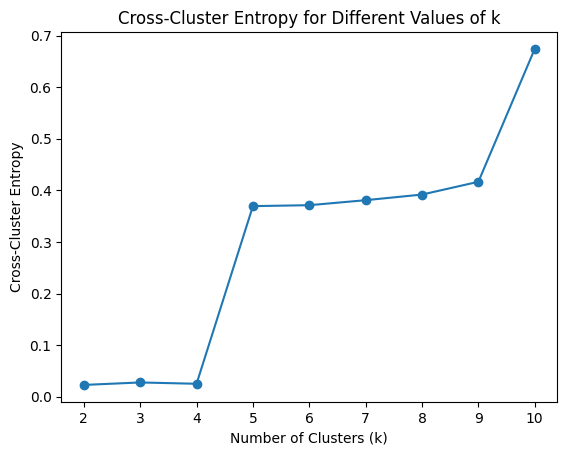

Optimal number of clusters (k): 1


In [70]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import warnings 
  
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

def calculate_cross_cluster_entropy(X, labels, centroids):
    """
    Calculate cross-cluster entropy for a given clustering.

    Parameters:
    - X: Input data
    - labels: Cluster assignments for each data point
    - centroids: Cluster centroids

    Returns:
    - Cross-cluster entropy
    """
    k = len(centroids)
    distances = cdist(X, centroids, 'euclidean')
    assignment_probabilities = np.exp(-distances) / np.sum(np.exp(-distances), axis=1, keepdims=True)
    entropy = -np.sum(assignment_probabilities * np.log(assignment_probabilities + 1e-10)) / len(X)
    return entropy

def find_optimal_k(X, max_k):
    """
    Find the optimal number of clusters using cross-cluster entropy.

    Parameters:
    - X: Input data
    - max_k: Maximum number of clusters to consider

    Returns:
    - Optimal number of clusters (k)
    - List of cross-cluster entropy values for each k
    """
    entropy_values = []

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        entropy = calculate_cross_cluster_entropy(X, kmeans.labels_, kmeans.cluster_centers_)
        entropy_values.append(entropy)

    return np.argmin(entropy_values) + 1, entropy_values

# Example usage:
# Generate some random data for demonstration purposes
np.random.seed(42)
data = scaled_df[['out_degree', 'mean_value_outgoing', 'unique_out_degree',
       'interval_outgoing', 'in_degree', 'mean_value_ingoing',
       'unique_in_degree', 'interval_ingoing']]

# Specify the maximum number of clusters to consider
max_clusters = 10

# Find the optimal number of clusters
optimal_k, entropy_values = find_optimal_k(data, max_clusters)

# Plot the cross-cluster entropy values for different k
plt.plot(range(2, max_clusters + 1), entropy_values, marker='o')
plt.title('Cross-Cluster Entropy for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cross-Cluster Entropy')
plt.show()

print(f"Optimal number of clusters (k): {optimal_k}")


Text(0, 0.5, 'WCSS')

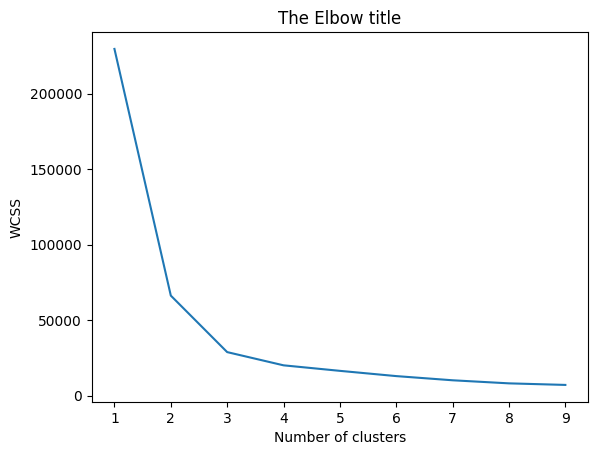

In [71]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(scaled_df[['out_degree', 'mean_value_outgoing', 'unique_out_degree',
       'interval_outgoing', 'in_degree', 'mean_value_ingoing',
       'unique_in_degree', 'interval_ingoing']])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [72]:
import pandas as pd
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.9, min_samples=10).fit(scaled_df[['out_degree', 'mean_value_outgoing', 'unique_out_degree',
       'interval_outgoing', 'in_degree', 'mean_value_ingoing',
       'unique_in_degree', 'interval_ingoing']])
# db = KMeans(n_clusters=4, random_state=42).fit(scaled_df[['out_degree', 'value_outgoing', 'in_degree', 'value_ingoing']])
scaled_df['cluster'] = db.labels_
scaled_df

,address,out_degree,mean_value_outgoing,unique_out_degree,interval_outgoing,in_degree,mean_value_ingoing,unique_in_degree,interval_ingoing,cluster
0,0x0000000000000000000000000000000000000000,2.321928,3.214177,0.000000,12.729182,2.321928,2.200540,0.000000,15.525652,-1
1,0x00000000003d71e9fc20fdeb46fb86afbbee4772,0.584963,2.405907,0.000000,15.323447,0.584963,1.352145,0.000000,15.323447,-1
2,0x00000000009726632680fb29d3f7a9734e3010e2,0.000000,0.692804,0.000000,0.000000,0.000000,0.465411,0.000000,0.000000,0
3,0x00000000009e50a7ddb7a7b0e2ee6604fd120e49,2.000000,2.012844,0.405465,14.653600,2.000000,1.149030,0.000000,14.653600,-1
4,0x0000000000a84d1a9b0063a910315c7ffa9cd248,1.000000,2.461687,0.405465,14.492559,1.000000,1.380969,0.584963,14.492559,1
...,...,...,...,...,...,...,...,...,...,...
4341,0xffd327a871660d58ac93cb1ae446b88ca349ad15,-1.000000,-1.489132,0.000000,0.000000,-1.000000,-0.661243,-1.000000,0.000000,2
4342,0xffd37e39a2542cf7dc612ecc7349fc9b800b9fa3,-1.000000,-0.246528,0.000000,0.000000,-1.000000,-0.661243,-1.000000,0.000000,2
4343,0xffe2dc948005f0a01bed3e9d869132c8194feeed,0.000000,0.854183,0.000000,0.000000,0.000000,0.550293,0.000000,0.000000,0
4344,0xffe9ab56ee0b8037041c74710eea2394e097682e,2.321928,0.187624,0.405465,13.119345,2.321928,0.205849,0.000000,13.118309,-1


In [39]:
# !pip install PyNomaly

In [73]:
scaled_df['cluster'].value_counts()

cluster
 0    1784
 2    1500
-1     354
 1     275
 3     212
 6     101
 4      72
 5      36
 7      12
Name: count, dtype: int64

In [74]:
from PyNomaly import loop
m = loop.LocalOutlierProbability(scaled_df[['out_degree', 'mean_value_outgoing', 'unique_out_degree',
       'interval_outgoing', 'in_degree', 'mean_value_ingoing',
       'unique_in_degree', 'interval_ingoing']], extent=3, n_neighbors=10, cluster_labels=list(db.labels_)).fit()
scores = m.local_outlier_probabilities
scaled_df['LoOP_scores'] = scores
scaled_df.sort_values(by=['LoOP_scores'], ascending=False).head(10)

,address,out_degree,mean_value_outgoing,unique_out_degree,interval_outgoing,in_degree,mean_value_ingoing,unique_in_degree,interval_ingoing,cluster,LoOP_scores
3594,0xd1f032fd5cdc3fe0bb7a1a73e2d6209257239f32,0.0,0.982834,0.0,0.000000,0.0,-0.524275,0.0,0.0,0,1.0
1084,0x3e82684ca7af8e692881fac281b3dc25fb618e7f,-1.0,1.150337,0.0,0.000000,-1.0,-0.661243,-1.0,0.0,2,0.999851
1269,0x4a2dfa7c22db6a15aaaaa646f791d77a5beb6efe,-1.0,-0.415694,0.0,14.191160,-1.0,-0.661243,-1.0,0.0,3,0.996659
1417,0x52048c478dd03dd5865074cb35c2656a3d1a8ced,-1.0,0.769360,0.0,0.000000,-1.0,-0.661243,-1.0,0.0,2,0.994101
2652,0x9ba40988b155016feb726be3cdd4f939d92b4ea4,0.0,0.620495,0.0,11.133669,0.0,0.550484,0.0,0.0,6,0.984866
2582,0x972f084c4375538bdccba8a0fdf76a3406acf4c0,-1.0,0.770886,0.0,0.000000,-1.0,-0.661243,-1.0,0.0,2,0.979366
1818,0x687ed137c2cb1fa58db8423797b505a9de037b1e,0.0,0.260711,0.0,0.000000,0.0,-0.242239,0.0,0.0,0,0.97379
4107,0xf12e6f12b981887c856c080eb50d3bc049830e15,-1.0,0.982900,0.0,0.000000,-1.0,-0.661243,-1.0,0.0,2,0.966341
2058,0x77e7572cf4e8ea3fe2221bb43d6500038c0880ff,-1.0,1.026192,0.0,0.000000,-1.0,-0.661243,-1.0,0.0,2,0.96629
2409,0x8d752affbf89fe999a7aab97a9d8c2f5d63dff78,-1.0,0.974392,0.0,0.000000,-1.0,-0.661243,-1.0,0.0,2,0.966071


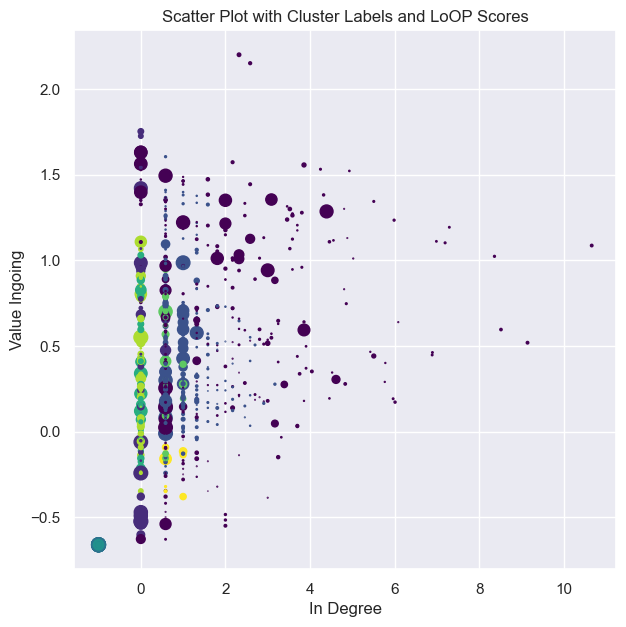

In [123]:
import matplotlib.pyplot as plt

# Assuming you have 'cluster_label' column in your dataframe
# cluster_labels = scaled_df['cluster']
score = scaled_df['LoOP_scores']

# Your existing code
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

# Use 'cluster_label' for color and 'LoOP_scores' for size
scatter = ax.scatter(scaled_df['in_degree'], scaled_df['mean_value_ingoing'],
                     c=cluster_labels, cmap='viridis', s=list(scaled_df['LoOP_scores']*100))
# scatter = ax.scatter(scaled_df['in_degree'], scaled_df['mean_value_ingoing'],
#                      c=scaled_df['LoOP_scores'], cmap='viridis', s=50)

# Add a colorbar as a legend for cluster labels
# cbar = plt.colorbar(scatter, ax=ax, label='Cluster Label')

# Set labels for axes
ax.set_xlabel('In Degree')
ax.set_ylabel('Value Ingoing')

# Add a title
ax.set_title('Scatter Plot with Cluster Labels and LoOP Scores')

# Show the plot
plt.show()


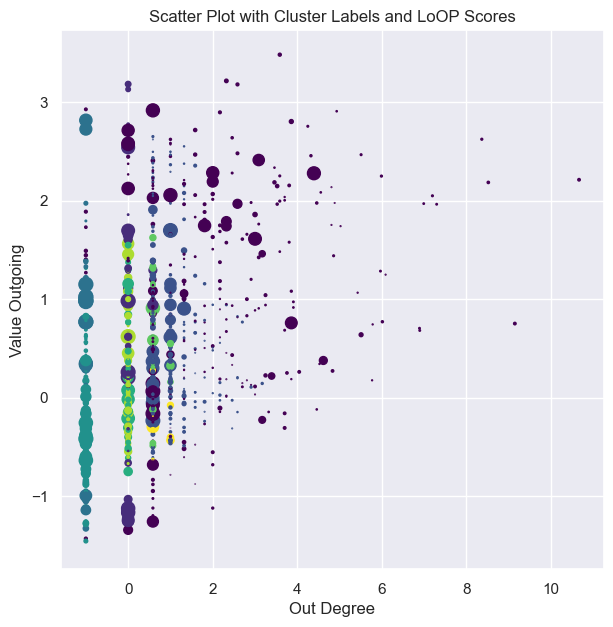

In [120]:
import matplotlib.pyplot as plt

# Assuming you have 'cluster_label' column in your dataframe
cluster_labels = scaled_df['cluster']

# Your existing code
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

# Use 'cluster_label' for color and 'LoOP_scores' for size
scatter = ax.scatter(scaled_df['out_degree'], scaled_df['mean_value_outgoing'],
                     c=cluster_labels, cmap='viridis', s=list(scaled_df['LoOP_scores']*100))

# Add a colorbar as a legend for cluster labels
# cbar = plt.colorbar(scatter, ax=ax, label='Cluster Label')

# Set labels for axes
ax.set_xlabel('Out Degree')
ax.set_ylabel('Value Outgoing')

# Add a title
ax.set_title('Scatter Plot with Cluster Labels and LoOP Scores')

# Show the plot
plt.show()


In [124]:
top_outlier = scaled_df[scaled_df['LoOP_scores'] >= 0.9]
top_outlier

,address,out_degree,mean_value_outgoing,unique_out_degree,interval_outgoing,in_degree,mean_value_ingoing,unique_in_degree,interval_ingoing,cluster,LoOP_scores
34,0x02243480998247cc77ffda795eb5e64302321655,-1.000000,0.982834,0.000000,0.000000,-1.000000,-0.661243,-1.000000,0.000000,2,0.95506
310,0x11783ae40772dd735025406f64fb4c68e9e18d36,1.000000,1.697140,0.000000,13.412859,1.000000,0.985890,0.000000,13.412877,1,0.956848
782,0x2bf8a5cf1d44d7760913390d6f698a0e67babb9c,-1.000000,-0.254248,0.000000,14.693387,-1.000000,-0.661243,-1.000000,0.000000,3,0.905078
1067,0x3db10b5be6a2004ac33e6779caf4d065df06f21d,0.000000,0.206239,0.000000,0.000000,0.000000,-0.061194,0.000000,0.000000,0,0.940749
1084,0x3e82684ca7af8e692881fac281b3dc25fb618e7f,-1.000000,1.150337,0.000000,0.000000,-1.000000,-0.661243,-1.000000,0.000000,2,0.999851
1269,0x4a2dfa7c22db6a15aaaaa646f791d77a5beb6efe,-1.000000,-0.415694,0.000000,14.191160,-1.000000,-0.661243,-1.000000,0.000000,3,0.996659
1275,0x4aa277c2d4baee10d7801754cb2b7dc4e4414781,0.584963,0.144900,0.000000,13.125488,0.584963,0.254159,0.584963,6.546785,-1,0.926583
1417,0x52048c478dd03dd5865074cb35c2656a3d1a8ced,-1.000000,0.769360,0.000000,0.000000,-1.000000,-0.661243,-1.000000,0.000000,2,0.994101
1439,0x535da99b6bad8e44211caddd8417d3a30af0ea04,0.584963,-0.232215,0.000000,10.812653,0.584963,-0.011102,0.000000,10.810475,1,0.95901
1571,0x5b31d2ae255c331c5ecf494f9db7bf37ff59257f,-1.000000,1.004837,0.000000,0.000000,-1.000000,-0.661243,-1.000000,0.000000,2,0.932222


In [75]:
scaled_df[scaled_df['address'].apply(lambda x: any([k == x for k in test_addresses]))][['address', 'LoOP_scores']].sort_values(by='LoOP_scores', ascending=False)

,address,LoOP_scores
3318,0xc31fc94f3fd088ee53ac915d6e8a14ff25a23c47,0.520287
4016,0xeb4af8a64070ef0dea6260e0bf2310748f014d88,0.072318
2701,0x9e8213bb81f5b7fe3cde490a096a630279ba063b,0.012377
4,0x0000000000a84d1a9b0063a910315c7ffa9cd248,0.012079
3871,0xe37e799d5077682fa0a244d46e5649f71457bd09,0.009073
299,0x1111111254eeb25477b68fb85ed929f73a960582,0.005369
2848,0xa7ca2c8673bcfa5a26d8ceec2887f2cc2b0db22a,0.00401
229,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0.003103
2449,0x9008d19f58aabd9ed0d60971565aa8510560ab41,0.002387
1266,0x4a14347083b80e5216ca31350a2d21702ac3650d,0.002315


In [45]:
test_scores = []
for index, row in X_test.iterrows():
    array = np.array([row['in_degree'], row['out_degree'], row['value_ingoing'], row['value_outgoing']])
    test_scores.append(m.stream(array))
test_scores

C:\Users\nguye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\PyNomaly\loop.py:272: UserWarning: Stream approach does not support clustered data. Automatically refit using single cluster of points.
  warnings.warn(


[0.03062693867101914,
 0.005701549979349095,
 0.0907272893354086,
 0.026063776286635455,
 0.035756451619343016,
 0.05054339925499015,
 0.029017085057317777,
 0.03568140337205044,
 0.10235922359114959,
 0.04077758417431553]

In [ ]:
class EtherDataset(DGLDataset):
    def __init__(self):
        super().__init__(name="etherium_data")
        
    def process(self):
        nodes_data = df_nodes
        edges_data = df_edges
        node_features = torch.from_numpy(nodes_data[['out_degree', 'value_outgoing', 'in_degree', 'value_ingoing']].to_numpy())
        edge_features = torch.from_numpy(edges_data['count'].to_numpy())
        edges_src = torch.from_numpy(edges_data['from_address'].to_numpy())
        edges_dst = torch.from_numpy(edges_data['to_address'].to_numpy())
        
        self.graph = dgl.graph(
            (edges_src, edges_dst), num_nodes=len(df_nodes)
        )
        self.graph.ndata["feat"] = node_features
        self.graph.edata["weight"] = edge_features
        
        n_nodes = nodes_data.shape[0]
    
    def __getitem__(self, idx):
        return self.graph
    
    def __len__(self):
        return 1

In [ ]:
dataset = EtherDataset()
graph = dataset[0]
print(graph)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:
!pip install grpcio-status


  Obtaining dependency information for grpcio-status from https://files.pythonhosted.org/packages/0f/31/9f87b4d6a5a03c92bab47d54bf516b7196667441e86550280178714bdb28/grpcio_status-1.59.3-py3-none-any.whl.metadata
  Using cached grpcio_status-1.59.3-py3-none-any.whl.metadata (1.3 kB)
Using cached grpcio_status-1.59.3-py3-none-any.whl (14 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\nguye\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
